In [2]:
from typing import (
    Callable,
    Dict,
    Iterable,
    Iterator,
    List,
    Optional,
    Sequence,
    TextIO,
    Tuple,
    Union,
)
import gzip
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def _close_when_exhausted(file: TextIO) -> Iterable[str]:
    with file:
        for line in file:
            yield json.loads(line)

def open_read_cleaned(filename) -> Iterable[str]:
    file: TextIO = gzip.open(filename, "rt")  # type: ignore
    return _close_when_exhausted(file)

def get_perplexities_and_text(corpus: Iterable[str], n: float = None) -> List[float]:
    perplexities = []
    texts = []
    if n is None:
        for entry in enumerate(corpus):
            perplexities.append(entry['perplexity'])
            texts.append(entry['text'])
    else:
        for i, entry in enumerate(corpus):
            if i >= n:
                break
            perplexities.append(entry['perplexity'])
            texts.append(entry['text'])

    return perplexities, texts

def describe_perplexities(perplexities: List[float]):
    print(pd.Series(perplexities).describe())

def perplexity_histogram(perplexities: List[float]):
    series = pd.Series(perplexities)
    series.hist(bins=1000, weights=np.zeros_like(series) + 1. / len(series), cumulative=True)
    plt.xlim(0, 5000)
    plt.xticks(np.arange(0, 5000, 200), rotation=90)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

# Perplexity descriptive stats per language

In [55]:
def perplexities_langs_stats(langs: list[str], n: int) -> None:
    for lang in langs:
        print(lang)
        if lang == "de":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/2/0000.json.gz"
        elif lang == "es":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/3/0000.json.gz"
        elif lang == "fr":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/1/0000.json.gz"
        elif lang == "ru":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/6/0000.json.gz"
        else:
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/0000.json.gz"
        train_corpus = open_read_cleaned(corpus)
        perplexities, _ = get_perplexities_and_text(train_corpus, n=n)
        describe_perplexities(perplexities)
        print("\n")

In [57]:
perplexities_langs_stats(
    ["en", "de", "es", "fr", "it", "ko", "nl", "pt", "ru", "zh"],
    n=100_000
)

de
count    100000.000000
mean        878.973901
std         960.759983
min          14.200000
25%         395.300000
50%         611.800000
75%        1019.800000
max       46451.000000
dtype: float64
es
count    100000.000000
mean        419.436802
std         492.000302
min           7.700000
25%         184.800000
50%         275.700000
75%         470.800000
max       28396.800000
dtype: float64
fr
count    100000.000000
mean        586.847523
std         959.302055
min           4.300000
25%         189.200000
50%         322.000000
75%         622.300000
max       70893.900000
dtype: float64
it
count    100000.000000
mean        522.677809
std         725.482231
min           1.800000
25%         224.100000
50%         332.900000
75%         562.500000
max       86453.800000
dtype: float64
ko
count    100000.000000
mean        193.209064
std         349.575732
min           1.500000
25%          46.100000
50%          72.800000
75%         198.000000
max       55450.000000
dtype

# Perplexity histograms per language

In [84]:
def perplexities_langs_histograms(langs: list[str], n: int) -> None:
    for lang in langs:
        print(lang)
        if lang == "de":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/2/0000.json.gz"
        elif lang == "es":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/3/0000.json.gz"
        elif lang == "fr":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/1/0000.json.gz"
        elif lang == "ru":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/6/0000.json.gz"
        else:
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/0000.json.gz"
        train_corpus = open_read_cleaned(corpus)
        perplexities, _ = get_perplexities_and_text(train_corpus, n=n)
        perplexity_histogram(perplexities)
        print("\n")

de


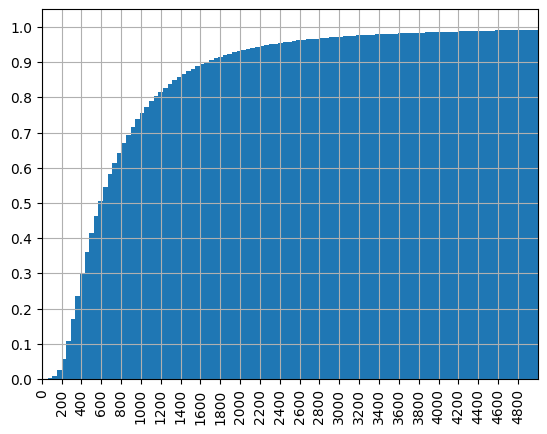



es


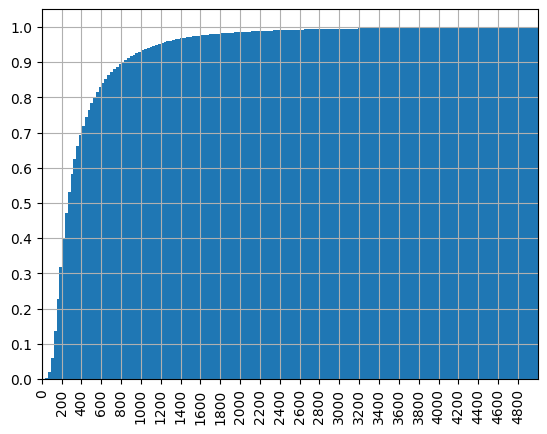



fr


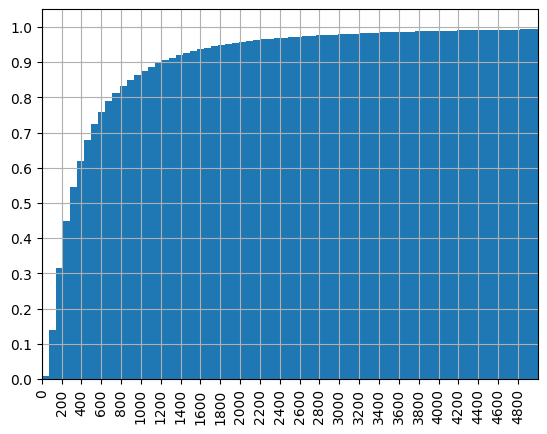



it


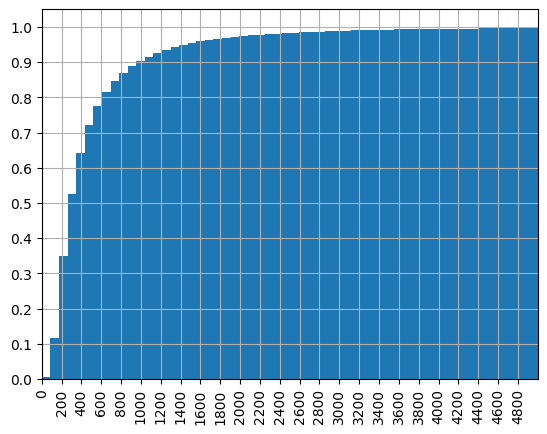



ko


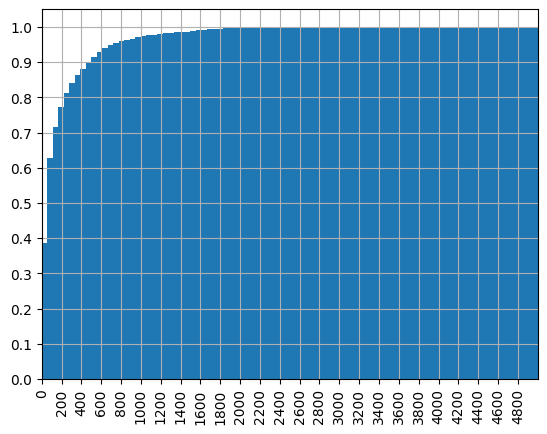



nl


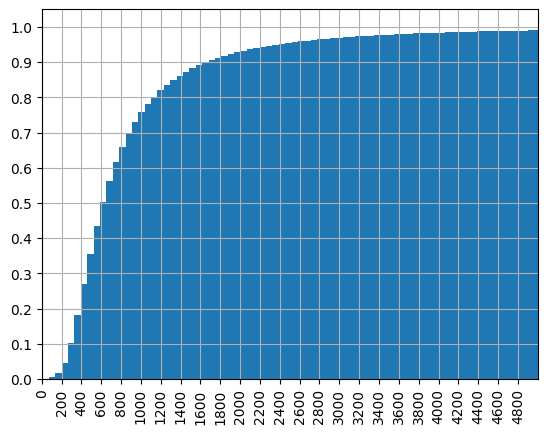



pt


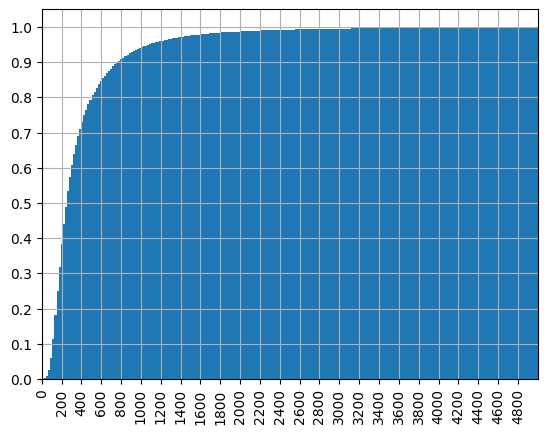



ru


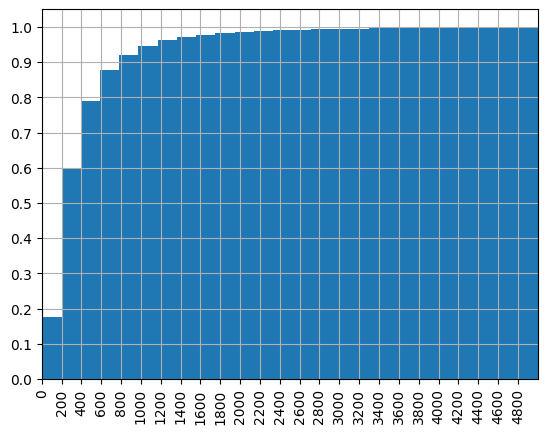



zh


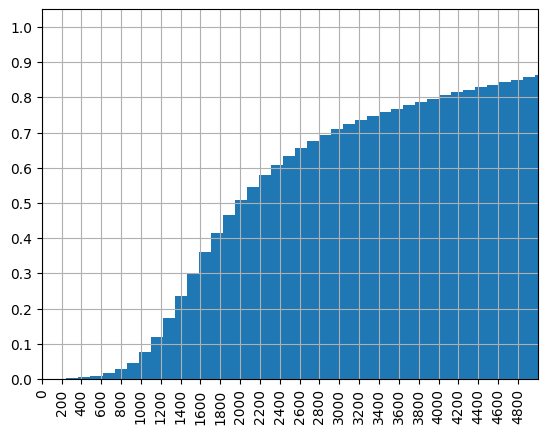

In [90]:
perplexities_langs_histograms(
    ["en", "de", "es", "fr", "it", "ko", "nl", "pt", "ru", "zh"],
    n=100_000
)

# Aggregate stats

In [103]:
def perplexities_langs_stats(langs: list[str], n: int) -> None:
    means = []
    maxes = []
    mins = []
    medians = []
    std_devs = []
    for lang in langs:
        print(f"On {lang}")
        if lang == "de":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/2/0000.json.gz"
        elif lang == "es":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/3/0000.json.gz"
        elif lang == "fr":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/1/0000.json.gz"
        elif lang == "ru":
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/6/0000.json.gz"
        else:
            corpus = f"/mnt/data_2/shared/tower_llm_data/{lang}/0000.json.gz"
        train_corpus = open_read_cleaned(corpus)
        perplexities, _ = get_perplexities_and_text(train_corpus, n=n)
        means.append(np.mean(perplexities)) 
        maxes.append(np.max(perplexities))
        mins.append(np.min(perplexities))
        medians.append(np.median(perplexities))
        std_devs.append(np.std(perplexities))
    print(f"Macro-avg mean: {np.mean(means)}")
    print(f"Macro-avg max: {np.mean(maxes)}")
    print(f"Macro-avg min: {np.mean(mins)}")
    print(f"Macro-avg median: {np.mean(medians)}")
    print(f"Macro-avg std_dev: {np.mean(std_devs)}")

In [104]:
perplexities_langs_stats(
    ["en", "de", "es", "fr", "it", "ko", "nl", "pt", "ru", "zh"],
    n=100_000
)

On de
On es
On fr
On it
On ko
On nl
On pt
On ru
On zh
Macro-avg mean: 819.4231974444444
Macro-avg max: 76421.04444444444
Macro-avg min: 6.111111111111111
Macro-avg median: 544.1999999999999
Macro-avg std_dev: 973.7085881455251


# Text examples with perplexity ranges

In [4]:
def get_text_within_perplexity_range(
    corpus_path: str,
    perplexity_range: Tuple[float, float],
    n_max: int = 20
) -> List[str]:
    corpus = open_read_cleaned(corpus_path)
    ranged_texts = []
    while len(ranged_texts) < n_max:
        entry = next(corpus)
        if perplexity_range[0] <= entry['perplexity'] <= perplexity_range[1]:
            ranged_texts.append(entry['text'])
    return ranged_texts

In [7]:
for perplexity_range in [(0, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700, 800)]:
    print("On perplexity range:", perplexity_range)
    for lang in ["ko"]:
        print(lang)
        if lang == "de":
            path = f"/mnt/data_2/shared/tower_llm_data/{lang}/2/0000.json.gz"
        elif lang == "es":
            path = f"/mnt/data_2/shared/tower_llm_data/{lang}/3/0000.json.gz"
        else:
            path = f"/mnt/data_2/shared/tower_llm_data/{lang}/0000.json.gz"
        texts = get_text_within_perplexity_range(
            corpus_path=path,
            perplexity_range=perplexity_range,
            n_max=50
        )
        with open(f"/mnt/data/jpombal/multilinguality_megatron/perplexity_texts/perplexity_texts_range_{lang}_{perplexity_range}.txt", "w") as f:
            f.write("\n".join(texts))

On perplexity range: (0, 50)
ko
On perplexity range: (50, 100)
ko
On perplexity range: (100, 200)
ko
On perplexity range: (200, 300)
ko
On perplexity range: (300, 400)
ko
On perplexity range: (400, 500)
ko
On perplexity range: (500, 600)
ko
On perplexity range: (600, 700)
ko
On perplexity range: (700, 800)
ko


# English

In [1]:
import datasets

In [7]:
data = datasets.load_from_disk('/mnt/data_2/shared/tower_llm_data/en/data')

In [11]:
data[0]

{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.',
 'timestamp': '2019-04-25T12:57:54Z',
 'url': None,
 'perplexity_score': 478.8,
 'text_length': 747,
 'domain': None,
 'dup_ratio': 0.0,
 'pairs': [],
 'repetitions': [],
 'included_in_dedup': True,
 'cluster': []}

In [16]:
def get_text_within_perplexity_range(
    corpus,
    perplexity_range: Tuple[float, float],
    n_max: int = 20
) -> List[str]:
    ranged_texts = []
    i = 0
    while len(ranged_texts) < n_max:
        entry = corpus[i]
        if perplexity_range[0] <= entry['perplexity_score'] <= perplexity_range[1]:
            ranged_texts.append(entry['text'])
        i += 1
    return ranged_texts

for perplexity_range in [(0, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700, 800)]:
    print("On perplexity range:", perplexity_range)
    texts = get_text_within_perplexity_range(
        corpus=data,
        perplexity_range=perplexity_range,
        n_max=50
    )
    with open(f"/mnt/data/jpombal/multilinguality_tower/notebooks/perplexity_texts/perplexity_texts_range_en_{perplexity_range}.txt", "w") as f:
        f.write("\n".join(texts))

On perplexity range: (0, 50)
On perplexity range: (50, 100)
On perplexity range: (100, 200)
On perplexity range: (200, 300)
On perplexity range: (300, 400)
On perplexity range: (400, 500)
On perplexity range: (500, 600)
On perplexity range: (600, 700)
On perplexity range: (700, 800)


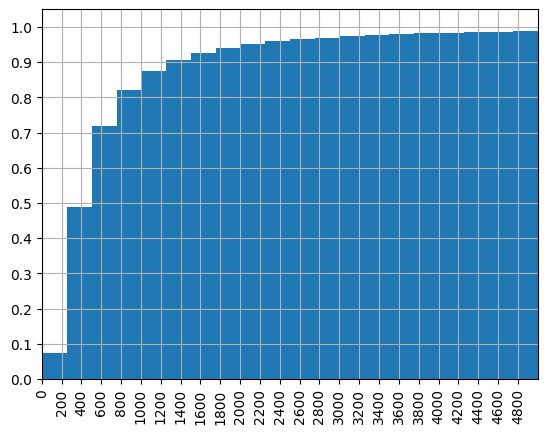

In [18]:
def perplexity_histogram(perplexities: List[float]):
    series = pd.Series(perplexities)
    series.hist(bins=1000, weights=np.zeros_like(series) + 1. / len(series), cumulative=True)
    plt.xlim(0, 5000)
    plt.xticks(np.arange(0, 5000, 200), rotation=90)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

def get_perplexities_and_text(corpus: Iterable[str], n: float = None) -> List[float]:
    perplexities = []
    texts = []
    if n is None:
        for entry in enumerate(corpus):
            perplexities.append(entry['perplexity_score'])
            texts.append(entry['text'])
    else:
        for i, entry in enumerate(corpus):
            if i >= n:
                break
            perplexities.append(entry['perplexity_score'])
            texts.append(entry['text'])

    return perplexities, texts

def describe_perplexities(perplexities: List[float]):
    print(pd.Series(perplexities).describe())

perplexities, _ = get_perplexities_and_text(data, n=100_000)
perplexity_histogram(perplexities)
print("\n")

In [ ]:
def describe_perplexities(perplexities: List[float]):
    print(pd.Series(perplexities).describe())

In [19]:
describe_perplexities(perplexities)

count    100000.000000
mean        811.207134
std        1455.270563
min           7.200000
25%         364.100000
50%         516.300000
75%         817.100000
max      249779.100000
dtype: float64
